<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/Active_Wiretap_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/Active_Wiretap_dataset_kitsune_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,345.833880,1336.169593,182741.587571,604.323930,1339.278171,180378.531164,1913.066006,1342.484069,178033.162324,19420.188363,...,0.000000e+00,10477.137202,1340.727571,425.910966,1340.727571,181400.151330,0.000000e+00,0.000000e+00,137292,0.0
1,167.867168,1276.877230,160030.211231,284.315792,1283.353269,154823.746252,869.255989,1292.157191,145874.385120,8708.527916,...,0.000000e+00,17213.615368,1336.240517,425.357292,1336.240517,180928.825969,0.000000e+00,0.000000e+00,279635,0.0
2,305.192767,1342.255904,171981.834746,563.947472,1341.762223,176209.279825,1880.206329,1338.455539,183266.064778,19566.707774,...,0.000000e+00,23301.191831,1341.394016,425.292546,1341.394016,180873.749823,0.000000e+00,0.000000e+00,528053,0.0
3,183.389655,1308.791204,125563.062709,305.241377,1305.986965,129767.818469,892.180283,1300.853177,136076.095956,8732.449316,...,0.000000e+00,27090.882172,1335.295481,426.854383,1335.295481,182204.664511,0.000000e+00,0.000000e+00,947892,0.0
4,436.659567,1331.934122,198328.172823,672.790777,1334.480440,194006.556831,1802.704213,1339.237109,185370.216681,16954.154954,...,0.000000e+00,27200.599537,1340.972883,425.459009,1340.972883,181015.368435,0.000000e+00,0.000000e+00,1009801,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,225.194858,1322.528722,203525.852764,380.263524,1329.837946,194558.754950,1135.839739,1336.181840,186441.765878,11271.813311,...,0.000000e+00,27782.453187,1340.241105,426.914623,1340.241105,182256.095218,0.000000e+00,0.000000e+00,1818443,1.0
22783,279.497161,1354.401652,173417.081270,423.877685,1351.437443,173420.842229,1164.499818,1347.305493,174162.297970,11272.100364,...,-6.254832e-24,26505.350300,1340.769014,425.896764,1342.110856,181388.053575,0.000000e+00,0.000000e+00,1973930,1.0
22784,215.370942,1320.175905,203122.471743,357.520416,1325.906577,197601.243920,1096.324893,1336.764079,186204.374841,11215.552458,...,0.000000e+00,27326.032255,1340.362712,426.724354,1340.362712,182093.674144,0.000000e+00,0.000000e+00,1622233,1.0
22785,186.230335,1312.893411,129249.226441,308.535459,1306.278699,134718.639391,896.763421,1298.283485,140885.554792,8764.769225,...,-1.765324e-19,24083.186996,1335.491546,425.725709,1336.838684,181242.379322,-4.439829e-16,-1.093544e-12,1772502,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.594857
1.0    0.405143
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_Active_Wiretap"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,345.833880,1336.169593,182741.587571,604.323930,1339.278171,180378.531164,1913.066006,1342.484069,178033.162324,19420.188363,...,0.000000e+00,10477.137202,1340.727571,425.910966,1340.727571,181400.151330,0.000000e+00,0.000000e+00,137292,0.0
1,167.867168,1276.877230,160030.211231,284.315792,1283.353269,154823.746252,869.255989,1292.157191,145874.385120,8708.527916,...,0.000000e+00,17213.615368,1336.240517,425.357292,1336.240517,180928.825969,0.000000e+00,0.000000e+00,279635,0.0
2,305.192767,1342.255904,171981.834746,563.947472,1341.762223,176209.279825,1880.206329,1338.455539,183266.064778,19566.707774,...,0.000000e+00,23301.191831,1341.394016,425.292546,1341.394016,180873.749823,0.000000e+00,0.000000e+00,528053,0.0
3,183.389655,1308.791204,125563.062709,305.241377,1305.986965,129767.818469,892.180283,1300.853177,136076.095956,8732.449316,...,0.000000e+00,27090.882172,1335.295481,426.854383,1335.295481,182204.664511,0.000000e+00,0.000000e+00,947892,0.0
4,436.659567,1331.934122,198328.172823,672.790777,1334.480440,194006.556831,1802.704213,1339.237109,185370.216681,16954.154954,...,0.000000e+00,27200.599537,1340.972883,425.459009,1340.972883,181015.368435,0.000000e+00,0.000000e+00,1009801,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,225.194858,1322.528722,203525.852764,380.263524,1329.837946,194558.754950,1135.839739,1336.181840,186441.765878,11271.813311,...,0.000000e+00,27782.453187,1340.241105,426.914623,1340.241105,182256.095218,0.000000e+00,0.000000e+00,1818443,1.0
22783,279.497161,1354.401652,173417.081270,423.877685,1351.437443,173420.842229,1164.499818,1347.305493,174162.297970,11272.100364,...,-6.254832e-24,26505.350300,1340.769014,425.896764,1342.110856,181388.053575,0.000000e+00,0.000000e+00,1973930,1.0
22784,215.370942,1320.175905,203122.471743,357.520416,1325.906577,197601.243920,1096.324893,1336.764079,186204.374841,11215.552458,...,0.000000e+00,27326.032255,1340.362712,426.724354,1340.362712,182093.674144,0.000000e+00,0.000000e+00,1622233,1.0
22785,186.230335,1312.893411,129249.226441,308.535459,1306.278699,134718.639391,896.763421,1298.283485,140885.554792,8764.769225,...,-1.765324e-19,24083.186996,1335.491546,425.725709,1336.838684,181242.379322,-4.439829e-16,-1.093544e-12,1772502,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.594857
1.0    0.405143
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
2067,0.647706,0.964276,0.657642,0.745800,0.974162,0.690509,0.900142,0.983433,0.740839,0.988330,...,0.453754,0.767645,0.990766,0.811158,0.990766,0.657977,0.567813,0.44442,0.235583,0.0
17155,0.840232,0.984254,0.611020,0.839154,0.988107,0.659391,0.847826,0.989077,0.731190,0.807871,...,0.453754,0.852774,0.990058,0.813077,0.990058,0.661094,0.567813,0.44442,0.604592,1.0
15617,0.489192,0.983516,0.581309,0.508386,0.988686,0.625227,0.543014,0.991151,0.698675,0.568161,...,0.453754,0.793326,0.990260,0.812790,0.991298,0.660628,0.567813,0.44442,0.779857,1.0
9391,0.307704,0.917305,0.559350,0.353805,0.934509,0.555253,0.412036,0.949095,0.570228,0.440565,...,0.453754,0.724082,0.985723,0.813697,0.985723,0.662103,0.567813,0.44442,0.199693,0.0
12295,0.763026,0.955067,0.753151,0.817527,0.968088,0.751662,0.920082,0.982452,0.755723,0.988519,...,0.453754,0.428282,0.990240,0.812710,0.990240,0.660497,0.567813,0.44442,0.081276,0.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
14751,-0.000071,0.000432,0.085303,-0.000010,0.000434,0.083052,0.000313,0.000437,0.080534,0.004750,...,-0.00015,0.010166,0.000438,0.000037,0.000439,0.079758,-0.000150,-0.00015,0.764249,1.0
5859,0.000026,0.000439,0.077320,0.000141,0.000440,0.076903,0.000717,0.000439,0.078271,0.008279,...,-0.00015,0.003650,0.000438,0.000037,0.000438,0.079641,-0.000150,-0.00015,0.047180,0.0
4634,-0.000075,0.000432,0.047363,-0.000024,0.000429,0.050039,0.000230,0.000425,0.054610,0.003668,...,-0.00015,0.011751,0.000436,0.000037,0.000436,0.079711,-0.000150,-0.00015,0.420229,0.0
20592,-0.000052,0.000426,0.062498,-0.000004,0.000423,0.063356,0.000247,0.000420,0.062836,0.003690,...,-0.00015,0.007140,0.000389,-0.000047,0.000390,0.023934,-0.000152,-0.00015,0.662844,1.0
3115,0.000022,0.000438,0.077219,0.000136,0.000438,0.077439,0.000712,0.000438,0.078547,0.008475,...,-0.00015,0.006400,0.000438,0.000037,0.000438,0.079566,-0.000150,-0.00015,0.098242,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  99.70159733192908


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

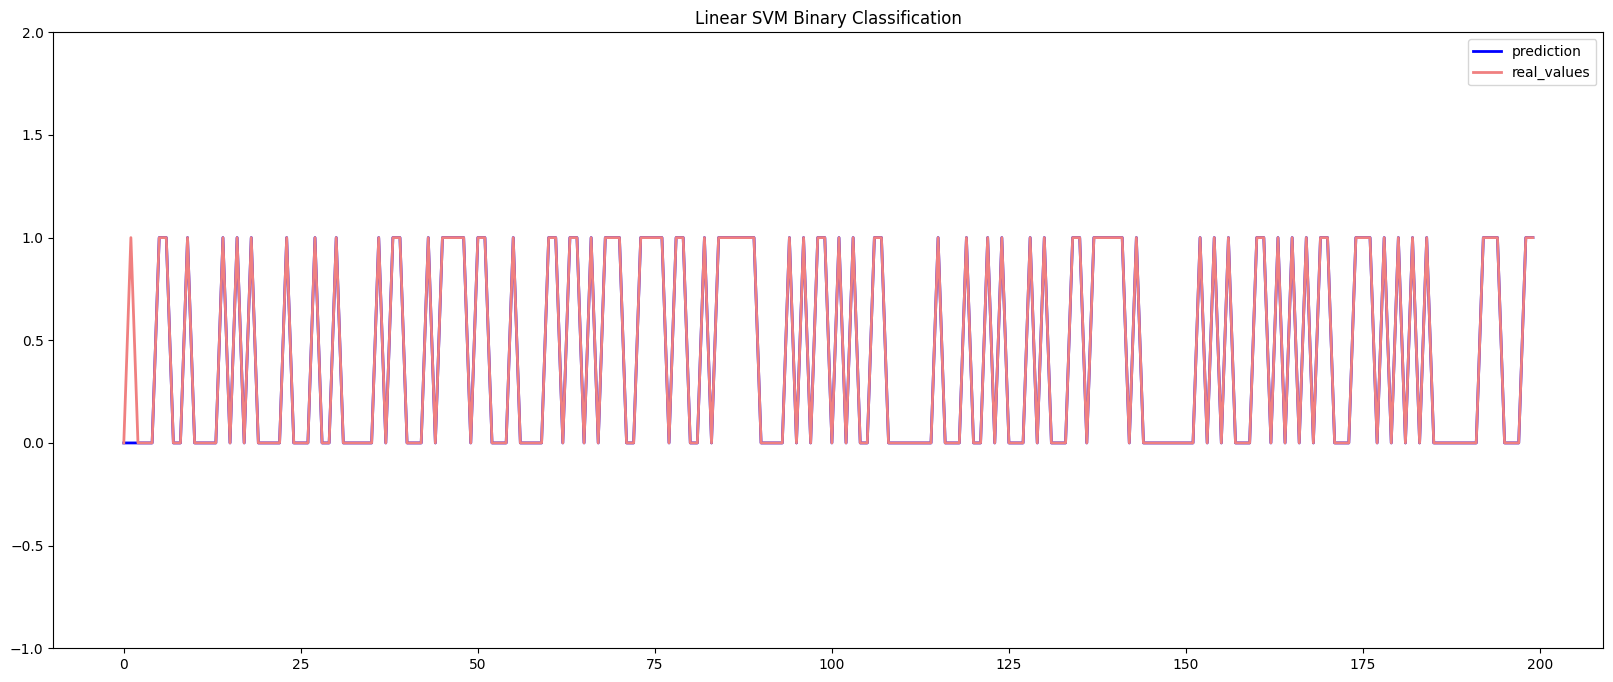

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      3362
     class 1       1.00      0.99      1.00      2335

    accuracy                           1.00      5697
   macro avg       1.00      1.00      1.00      5697
weighted avg       1.00      1.00      1.00      5697

False Positive Rate -  [1. 0.]
False Negative Rate -  [0.         0.00728051]
Thresholds -  [0. 1.]


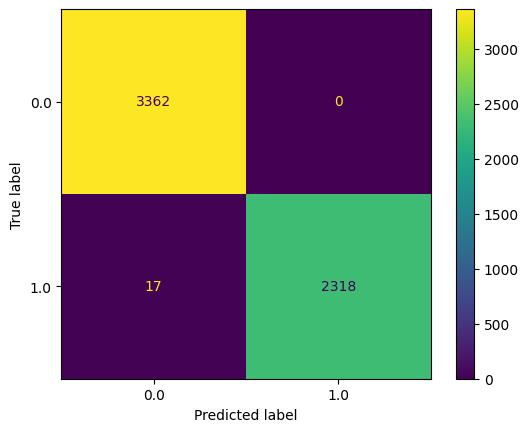

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 267ms/step - loss: 0.8537 - accuracy: 0.4019 - val_loss: 0.7338 - val_accuracy: 0.4102
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7086 - accuracy: 0.4710 - val_loss: 0.6672 - val_accuracy: 0.5828
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6628 - accuracy: 0.5853 - val_loss: 0.6618 - val_accuracy: 0.5898
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6571 - accuracy: 0.5979 - val_loss: 0.6542 - val_accuracy: 0.5907
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6458 - accuracy: 0.5984 - val_loss: 0.6392 - val_accuracy: 0.5907
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6303 - accuracy: 0.5984 - val_loss: 0.6230 - val_accuracy: 0.5907
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6175 - accuracy: 0.6033 - val_loss: 0.6120 - val_accuracy: 0.6153
Epoch 8/100
3/3 [==

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

179/179 [==============================] - 1s 2ms/step - loss: 12971.3643 - accuracy: 0.5901
Test results - Loss: 12971.3642578125 - Accuracy: 59.01351571083069


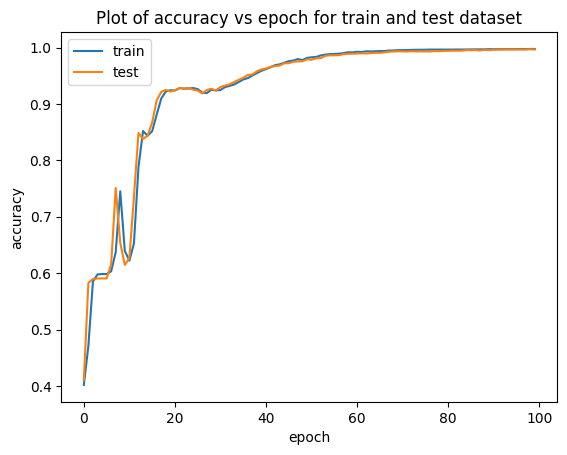

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

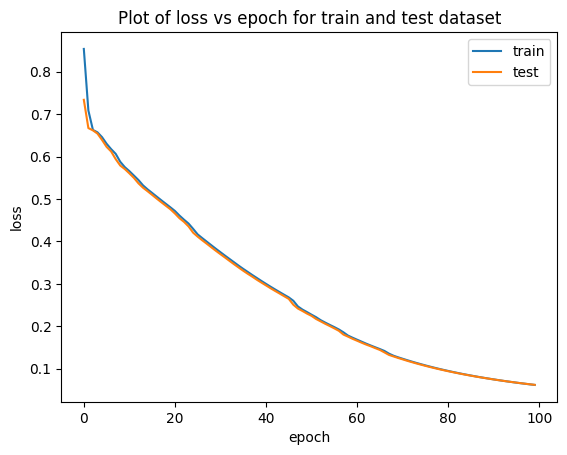

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

179/179 [==============================] - 0s 1ms/step


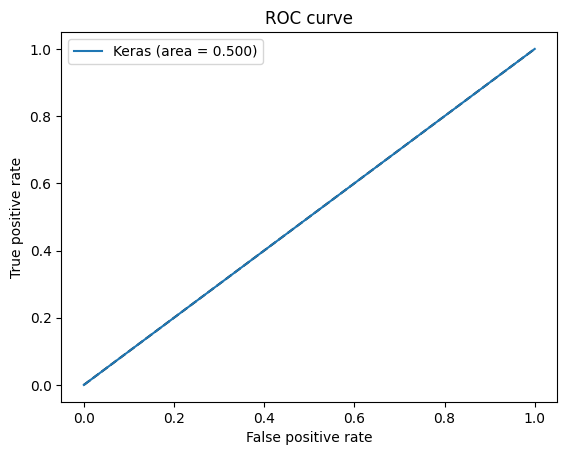

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

179/179 [==============================] - 0s 1ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3362
           1       0.00      0.00      0.00      2335

    accuracy                           0.59      5697
   macro avg       0.30      0.50      0.37      5697
weighted avg       0.35      0.59      0.44      5697



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


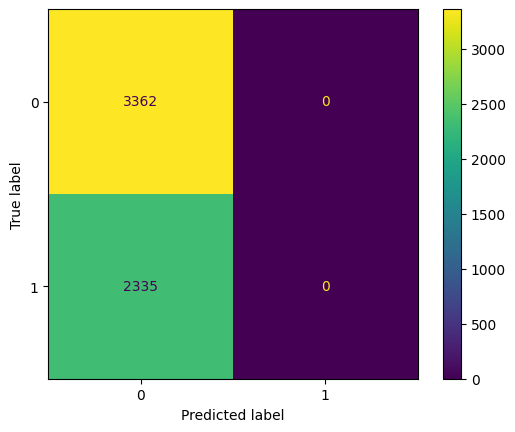

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X31           0.306617
X66           0.306617
X1            0.306809
X16           0.306809
X38           0.319298
X69           0.319298
X19           0.319523
X4            0.319523
X72           0.327838
X45           0.327838
X22           0.328080
X7            0.328080
X75           0.330259
X52           0.330259
X25           0.330498
X10           0.330498
X64           0.404240
Unnamed: 0    0.812669
label         1.000000
Name: label, dtype: float64

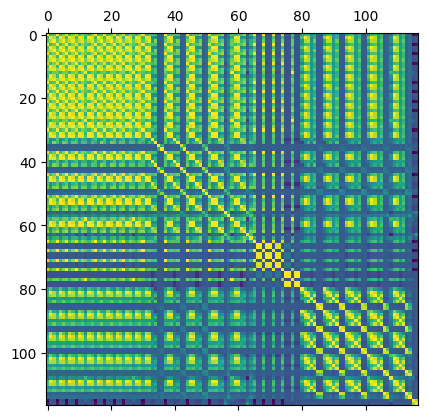

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(17090, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(17090, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(5697, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 4s 330ms/step - loss: 0.6715 - accuracy: 0.5981 - val_loss: 0.6602 - val_accuracy: 0.5898
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6515 - accuracy: 0.5981 - val_loss: 0.6402 - val_accuracy: 0.5898
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6321 - accuracy: 0.5981 - val_loss: 0.6215 - val_accuracy: 0.5898
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6139 - accuracy: 0.5989 - val_loss: 0.6041 - val_accuracy: 0.5930
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.5966 - accuracy: 0.6032 - val_loss: 0.5870 - val_accuracy: 0.6074
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5795 - accuracy: 0.6319 - val_loss: 0.5692 - val_accuracy: 0.6413
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5611 - accuracy: 0.6694 - val_loss: 0.5501 - val_accuracy: 0.7695
Epoch 8/100
3/3 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

179/179 [==============================] - 1s 2ms/step - loss: 2.7824 - accuracy: 0.5901
Test results - Loss: 2.7824409008026123 - Accuracy: 59.01351571083069%


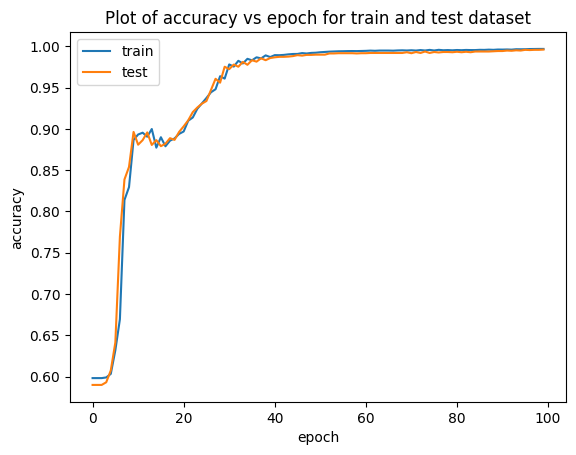

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

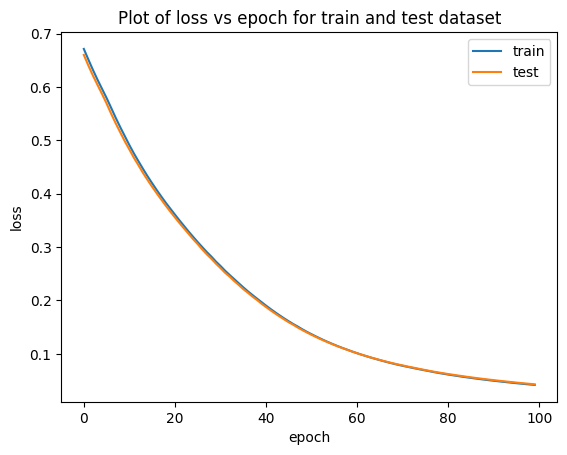

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(5697,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

179/179 [==============================] - 1s 3ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3362
           1       0.00      0.00      0.00      2335

    accuracy                           0.59      5697
   macro avg       0.30      0.50      0.37      5697
weighted avg       0.35      0.59      0.44      5697



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


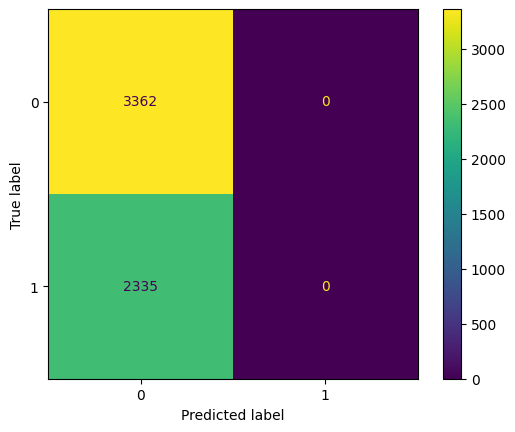

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.4933 - accuracy: 0.0013 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.0186 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.0884 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.0928 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.1115 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.1203 - val_loss: 612738824929280.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
35/35 [===========================

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

179/179 [==============================] - 1s 2ms/step - loss: 612738690711552.0000 - accuracy: 0.0000e+00
Test results - Loss: 612738690711552.0 - Accuracy: 0.0%


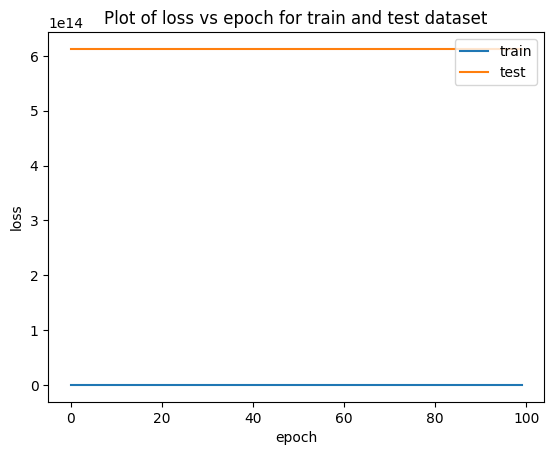

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

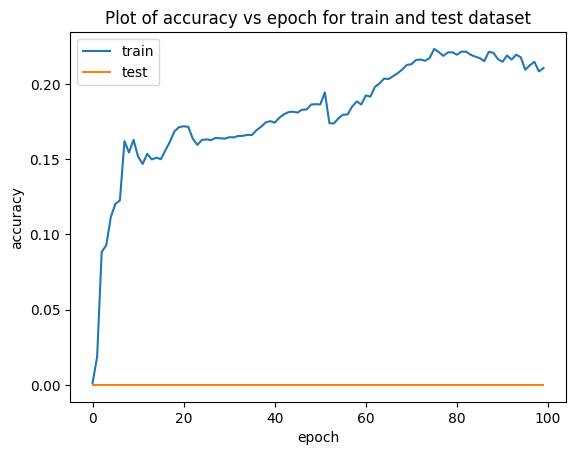

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

179/179 [==============================] - 0s 2ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(5697, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
10/10 [==============================] - 2s 31ms/step - loss: 0.6760 - accuracy: 0.5925 - val_loss: 0.6801 - val_accuracy: 0.5807
Epoch 2/300
10/10 [==============================] - 0s 10ms/step - loss: 0.6759 - accuracy: 0.5925 - val_loss: 0.6807 - val_accuracy: 0.5807
Epoch 3/300
10/10 [==============================] - 0s 10ms/step - loss: 0.6761 - accuracy: 0.5925 - val_loss: 0.6804 - val_accuracy: 0.5807
Epoch 4/300
10/10 [==============================] - 0s 10ms/step - loss: 0.6765 - accuracy: 0.5925 - val_loss: 0.6801 - val_accuracy: 0.5807
Epoch 5/300
10/10 [==============================] - 0s 11ms/step - loss: 0.6762 - accuracy: 0.5925 - val_loss: 0.6806 - val_accuracy: 0.5807
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 0.6762 - accuracy: 0.5925 - val_loss: 0.6802 - val_accuracy: 0.5807
Epoch 7/300
10/10 [==============================] - 0s 11ms/step - loss: 0.6759 - accuracy: 0.5925 - val_loss: 0.6809 - val_accuracy: 0.5807
Epoch 

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

179/179 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5873
Test results - Loss: 0.6905527114868164 - Accuracy: 58.732664585113525%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

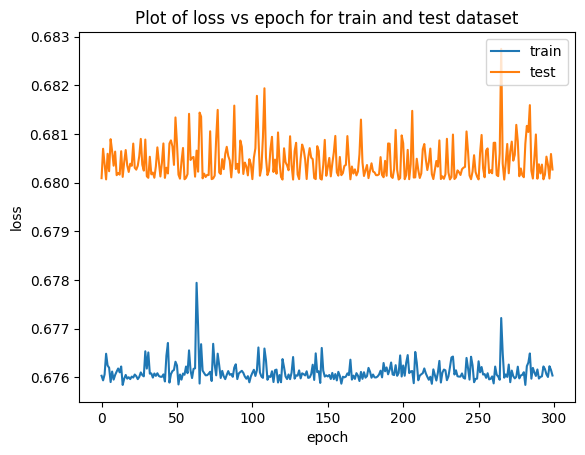

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

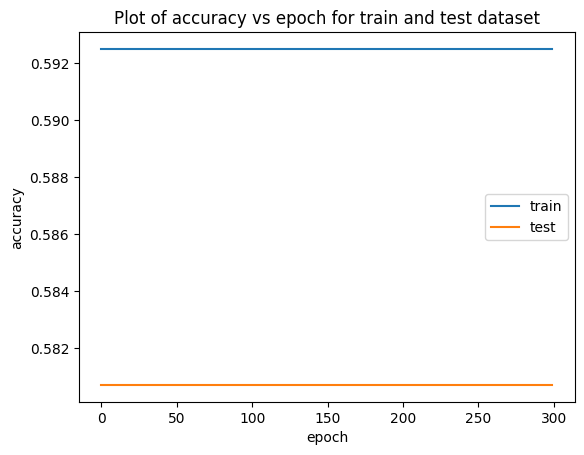

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

179/179 [==============================] - 0s 2ms/step


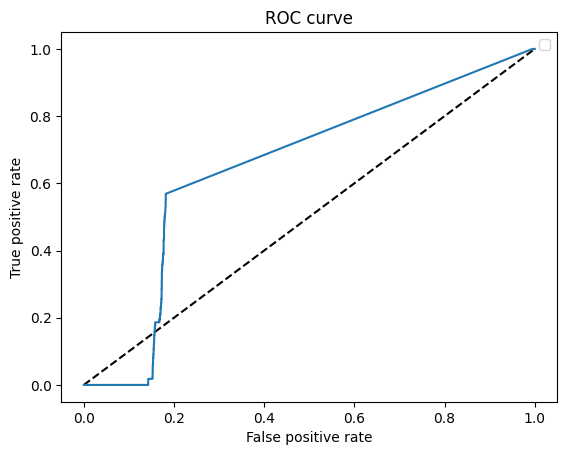

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

179/179 [==============================] - 0s 1ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.         0.00475907]
False Negative Rate -  [0. 1.]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3362
           1       0.00      0.00      0.00      2335

    accuracy                           0.59      5697
   macro avg       0.29      0.50      0.37      5697
weighted avg       0.35      0.59      0.44      5697



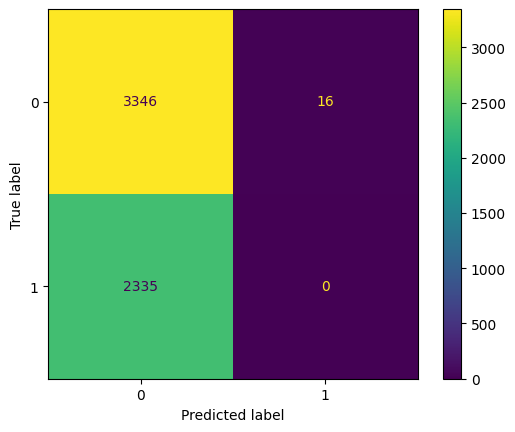

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()